# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

501596.6994081075 -549.8998019168754 0.1513877128805333
4745.087199664209
6051.288176908856
8521.523173747235


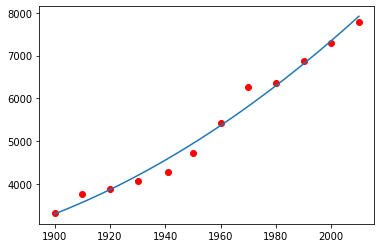

In [2]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
B = matrix([ones(n), year, year**2]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

26802353.274437316 -40923.77128624008 20.806645395172925 -0.0035217535289880923
4673.021194063127
6172.457116425037
8041.685336280614


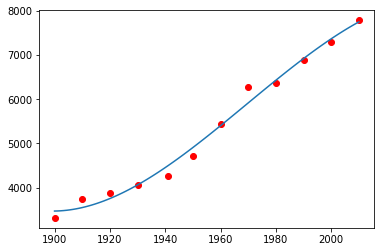

In [12]:
# Try to reimplement the problem changing the order (3) of the polynomial fitting

B = matrix([ones(n), year, year**2, year**3]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
a3 = float(a[3])
print(a0, a1, a2, a3)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2 + a3*x**3

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

-76819.30809749143 42.02023345850122
4910.045979293427
6170.652983048465
8061.563488681029


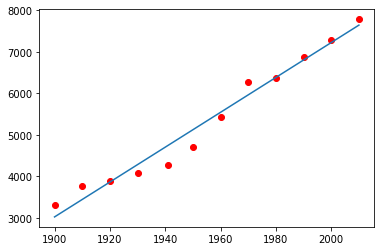

In [13]:
# Try to reimplement the problem changing the order (1) of the polynomial fitting

B = matrix([ones(n), year]).T
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
print(a0, a1)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

[-3.65901379e-12  3.69563352e-08 -1.34696613e-04  1.54865687e-01
  2.85031903e+02 -1.06190090e+06  1.19086968e+09 -4.78802049e+11]
4520.7982177734375
6309.215881347656
9063.187622070312


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


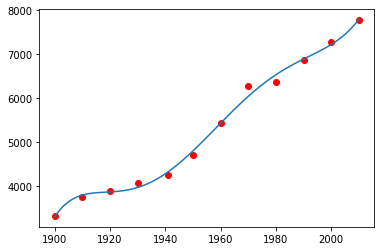

In [21]:
# Try to compare the results with the one obtained with the numpy polynomial fitting tool (polyfit)

a = polyfit(year, population, 7)
print(a)
f = poly1d(a)
_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')
print(f(1945))
print(f(1975))
print(f(2020)) 